In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [169]:
df = pd.read_csv('weatherAUS.csv', header=None)

C:\Users\manop\AppData\Local\Temp\ipykernel_12100\2727561029.py:1: DtypeWarning: Columns (2,3,4,5,6,8,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherAUS.csv', header=None)


In [170]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44,W,...,71,22,1007.7,1007.1,8,NaN,16.9,21.8,No,No
2,2008-12-02,Albury,7.4,25.1,0,NaN,NaN,WNW,44,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-03,Albury,12.9,25.7,0,NaN,NaN,WSW,46,W,...,38,30,1007.6,1008.7,NaN,2,21,23.2,No,No
4,2008-12-04,Albury,9.2,28,0,NaN,NaN,NE,24,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [171]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  145461  filas y  23  columnas


In [172]:

col_names = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
             'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
             'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
             'RainToday', 'RainTomorrow']

df.columns = col_names

print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [173]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44,W,...,71,22,1007.7,1007.1,8,NaN,16.9,21.8,No,No
2,2008-12-02,Albury,7.4,25.1,0,NaN,NaN,WNW,44,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-03,Albury,12.9,25.7,0,NaN,NaN,WSW,46,W,...,38,30,1007.6,1008.7,NaN,2,21,23.2,No,No
4,2008-12-04,Albury,9.2,28,0,NaN,NaN,NE,24,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145461 entries, 0 to 145460
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           145461 non-null  object
 1   Location       145461 non-null  object
 2   MinTemp        143976 non-null  object
 3   MaxTemp        144200 non-null  object
 4   Rainfall       142200 non-null  object
 5   Evaporation    82671 non-null   object
 6   Sunshine       75626 non-null   object
 7   WindGustDir    135135 non-null  object
 8   WindGustSpeed  135198 non-null  object
 9   WindDir9am     134895 non-null  object
 10  WindDir3pm     141233 non-null  object
 11  WindSpeed9am   143694 non-null  object
 12  WindSpeed3pm   142399 non-null  object
 13  Humidity9am    142807 non-null  object
 14  Humidity3pm    140954 non-null  object
 15  Pressure9am    130396 non-null  object
 16  Pressure3pm    130433 non-null  object
 17  Cloud9am       89573 non-null   object
 18  Clou

In [175]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [176]:
df.dropna(inplace=True)


In [177]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [186]:
df.duplicated().sum()

0

In [187]:
df.MinTemp.value_counts()

9.6        342
8.5        333
12.5       331
9.7        331
8.9        330
          ... 
-3.8         1
-6.7         1
-5.8         1
29.8         1
MinTemp      1
Name: MinTemp, Length: 376, dtype: int64

In [188]:
df.MaxTemp.value_counts()

19.6    303
18.2    300
19.4    300
20.1    298
23.5    294
       ... 
47.3      1
45.4      1
42        1
41        1
7.5       1
Name: MaxTemp, Length: 427, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

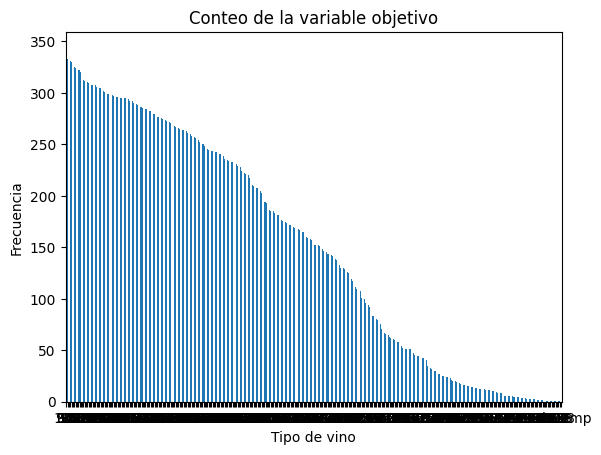

In [189]:
df.MinTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

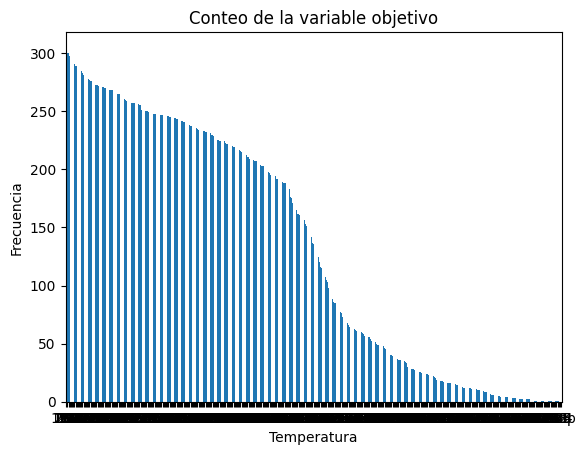

In [191]:
df.MaxTemp.value_counts().plot(kind="bar")

plt.title("Conteo de la variable objetivo")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)

In [178]:
df['MinTemp'] = df['MinTemp'].astype(str)
df['MaxTemp'] = df['MaxTemp'].astype(str)

C:\Users\manop\AppData\Local\Temp\ipykernel_12100\515359020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
C:\Users\manop\AppData\Local\Temp\ipykernel_12100\515359020.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
C:\Users\manop\AppData\Local\Temp\ipykernel_12100\515359020.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
C:\Users\manop\AppData\Local\Temp\ipykernel_12100\515359020.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assign

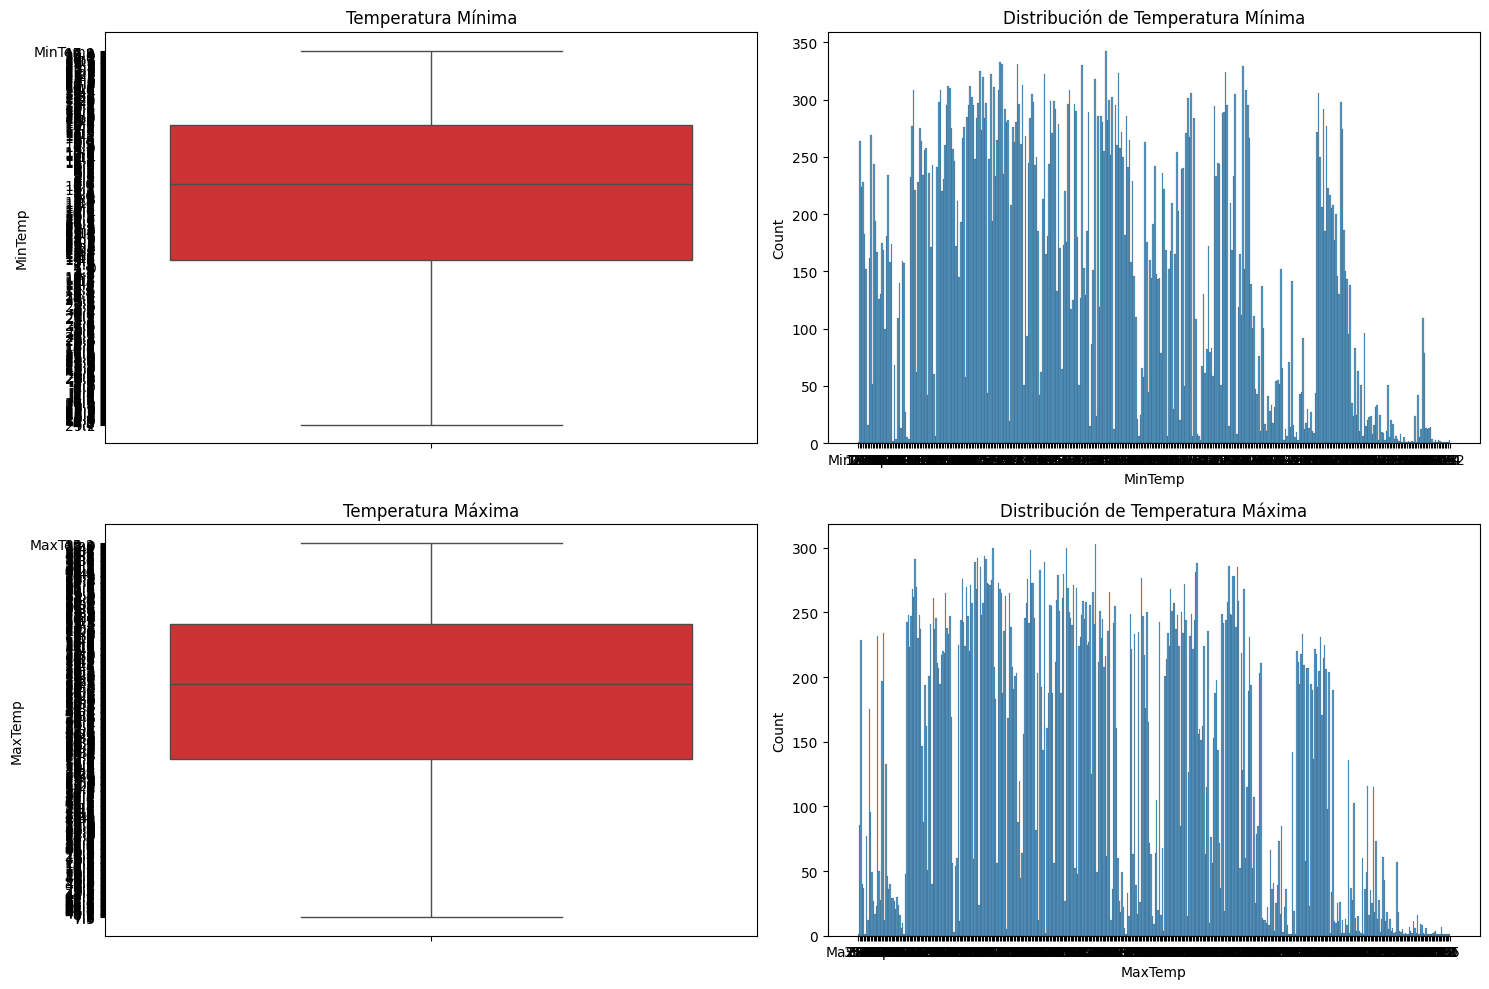

In [179]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Un diagrama de caja y bigote en la primera parcela sobre la variable MinTemp
sns.boxplot(ax=axes[0, 0], data=df, y='MinTemp', x=None, palette="Set1")
axes[0, 0].set_title("Temperatura Mínima")

# Un histograma en la segunda parcela sobre la variable MinTemp
sns.histplot(ax=axes[0, 1], data=df, x='MinTemp', palette="Set1")
axes[0, 1].set_title("Distribución de Temperatura Mínima")

# Un diagrama de caja y bigote en la tercera parcela sobre la variable MaxTemp
sns.boxplot(ax=axes[1, 0], data=df, y='MaxTemp', x=None, palette="Set1")
axes[1, 0].set_title("Temperatura Máxima")

# Un histograma en la cuarta parcela sobre la variable MaxTemp
sns.histplot(ax=axes[1, 1], data=df, x='MaxTemp', palette="Set1")
axes[1, 1].set_title("Distribución de Temperatura Máxima")

plt.tight_layout()
plt.show()

In [180]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [181]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,NaN,NaN
6050,2009-01-01,Cobar,17.9,35.2,0,12,12.3,SSW,48,ENE,...,20,13,1006.3,1004.4,2,5,26.6,33.4,0.0,0.0
6051,2009-01-02,Cobar,18.4,28.9,0,14.8,13,S,37,SSE,...,30,8,1012.9,1012.1,1,1,20.3,27,0.0,0.0
6053,2009-01-04,Cobar,19.4,37.6,0,10.8,10.6,NNE,46,NNE,...,42,22,1012.3,1009.2,1,6,28.7,34.9,0.0,0.0
6054,2009-01-05,Cobar,21.9,38.4,0,11.4,12.2,WNW,31,WNW,...,37,22,1012.7,1009.1,1,5,29.1,35.6,0.0,0.0


Text(0, 0.5, 'Cantidad')

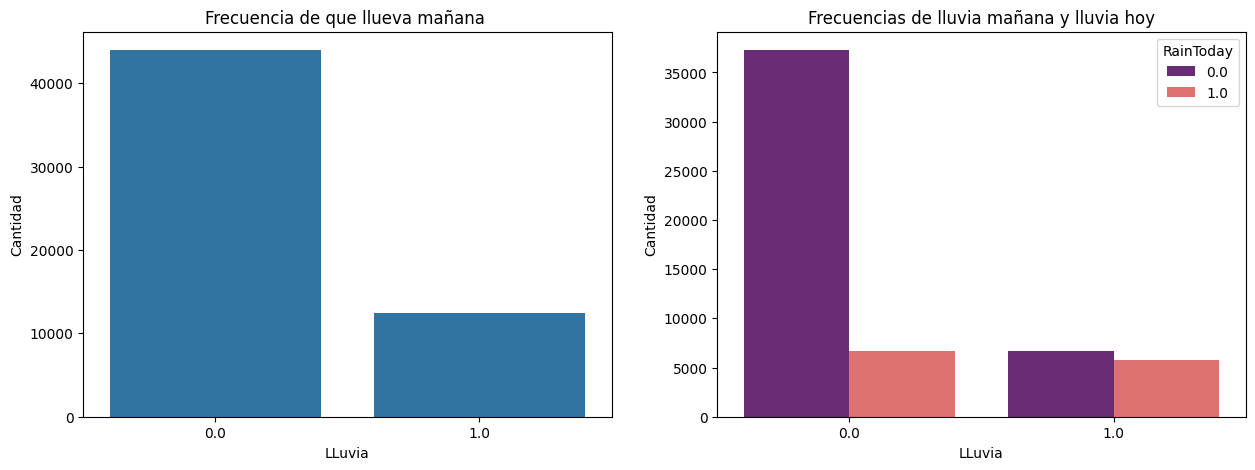

In [184]:

fig, axes = plt.subplots(1,2 , figsize = (15,5))

sns.countplot(ax=axes[0], x = "RainTomorrow", data = df)
axes[0].set_title("Frecuencia de que llueva mañana ")
axes[0].set_xlabel("LLuvia") 
axes[0].set_ylabel("Cantidad")

sns.countplot(ax=axes[1], x = "RainTomorrow", hue = 'RainToday', data = df, palette="magma")
axes[1].set_title("Frecuencias de lluvia mañana y lluvia hoy")
axes[1].set_xlabel("LLuvia") 
axes[1].set_ylabel("Cantidad")



In [185]:
df.corr()

C:\Users\manop\AppData\Local\Temp\ipykernel_12100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RainToday,RainTomorrow
RainToday,1.000000,0.309098
RainTomorrow,0.309098,1.000000
